In [1]:
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel('datasets/Aracaju.xlsx')
df2 = pd.read_excel('datasets/Fortaleza.xlsx')
df3 = pd.read_excel('datasets/Natal.xlsx')
df4 = pd.read_excel('datasets/Recife.xlsx')
df5 = pd.read_excel('datasets/Salvador.xlsx')

Planilhas obtidas do seguinte repositório: https://github.com/samuelfabiano/bootcamp-unimedbh-pandas

In [3]:
#Juntando os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [4]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.dtypes #tipos de dados das colunas

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [7]:
df['LojaID'] = df['LojaID'].astype('object') 
#Transformação de tipo de int64 (inteiro) para object (string)

In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [9]:
df.sample(5)  #tira amostras aleatórias

,Cidade,Data,Vendas,LojaID,Qtde
116,Salvador,2019-03-02,41.78,1034,3
134,Fortaleza,2019-03-02,195.18,980,5
64,Recife,2019-01-01,89.32,983,2
68,Recife,2019-01-01,175.45,980,3
81,Natal,2019-04-02,564.00,854,2


**Tratando valores faltantes**

In [10]:
#Verificando se há e quantos são os valores faltantes em cada coluna

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Substituindo valores nulos pela média.

df['Vendas'].fillna(df['Vendas'].mean(), inplace = True)
# O inplace=True permite a substituição direta dos valores na memória; 

In [12]:
#Substituindo valores nulos por zero
df['Vendas'].fillna('0', inplace = True)


In [13]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [14]:
#Apagar linhas com valores nulos em uma dada coluna
df.dropna(subset= ['Vendas'],inplace=True) 

In [15]:
#Removendo linhas com valores faltantes em todas as colunas.
df.dropna(how='all',inplace=True) 

#### Criando novas colunas

In [16]:
df['Receita']= df['Vendas']*(df['Qtde'])

In [17]:
df['Receita']

0      142.00
1       85.26
2       71.55
3       21.07
4      196.08
        ...  
235     41.84
236    378.87
237    114.18
238    139.64
239    484.23
Name: Receita, Length: 894, dtype: float64

#### Valor máximo e mínimo

In [18]:
df['Receita'].max()

3544.0

In [19]:
df['Receita'].min()

3.34

#### Exibir linhas com maiores e menores valores

In [20]:
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [21]:
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


#### Agrupamento por cidade

In [22]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

#### Ordenando o conjunto de dados

In [23]:
df.sort_values('Receita', ascending=False).head(10) #do maior ao menor

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [24]:
df.sort_values('Receita', ascending=True).head(10) #do menor ao maior

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Salvador,2019-01-01,4.57,1035,1,4.57
92,Natal,2019-01-02,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
161,Salvador,2019-01-02,5.80,1036,1,5.80
161,Natal,2019-01-02,5.80,1036,1,5.80
216,Natal,2019-01-02,5.82,1035,1,5.82
216,Salvador,2019-01-02,5.82,1035,1,5.82


# Trabalhando com datas

Transformando a data em tipo inteiro.

In [25]:
df['Data'] = df['Data'].astype('int64')

Verificando o tipo de dado:

In [26]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

#### Transformando a data em tipo data.

In [27]:
df['Data']=pd.to_datetime(df['Data']) #Coluna data recebe a valores transformados da coluna Data

In [28]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

#### Agrupamento por ano

In [29]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

#Agrupando(Coluna.pelo critério anual).Somando a Receita

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

#### Criando uma coluna para o ano

In [30]:
#Declarando uma nova coluna

df['Ano_Venda'] = df['Data'].dt.year
#Ano_Venda recebe a informação do ano da coluna Data

#### Criando a coluna mês

In [31]:
df['mes_venda'] =  df['Data'].dt.month

#### Criando a coluna dia

In [32]:
df['dia_venda'] =  df['Data'].dt.day

#### Criando a coluna trimestre.

In [33]:
df.sample(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
25,Salvador,2019-01-01,220.62,1035,1,220.62,2019,1,1
218,Salvador,2019-01-02,189.12,1036,3,567.36,2019,1,2
134,Fortaleza,2019-03-02,195.18,980,5,975.90,2019,3,2


#### Retornando a data mais antiga

In [34]:
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

#### Calculando a diferença de dias de uma determinada data para a primeira data.

In [35]:
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [36]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
12,Natal,2019-02-02,709.0,853,3,2127.0,2019,2,2,397 days


In [37]:
df['trimestre_venda'] = df['Data'].dt.quarter

In [38]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Natal,2019-03-18,886.0,853,4,3544.0,2019,3,18,441 days,1


#### Filtrando vendas de março de 2019

In [39]:
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

#variável recebe as linhas em que o ano de Data é 2019 e o mês é março.

In [40]:
vendas_marco_2019.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1


# Visualização de dados

In [41]:
#Contando vendas (linhas) de cada loja

df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

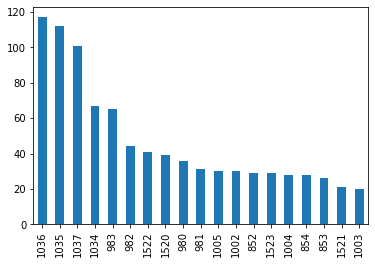

In [42]:
#Gráfico de barras

df['LojaID'].value_counts(ascending=False).plot.bar()

<AxesSubplot:>

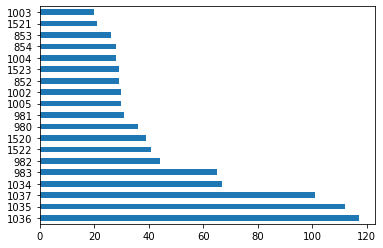

In [43]:
#Gráfico de barras horizontais

df['LojaID'].value_counts(ascending=False).plot.barh()

<AxesSubplot:ylabel='Receita'>

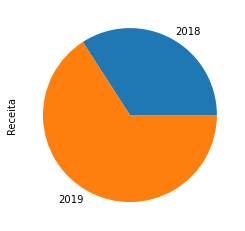

In [44]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()


#Agrupando (anos da data)[somando Coluna 'Receita'] e utilizando tudo isso em um gráfico de pizza.


In [45]:
#Total de vendas por cidade

df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

<AxesSubplot:title={'center':'Total de vendas por cidade'}>

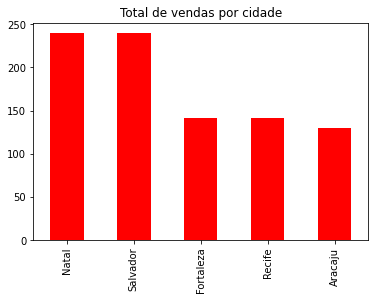

In [46]:
#Gráfico do Pandas 
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade', color = 'red')

## Usando Matplotlib

In [47]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Vendas')

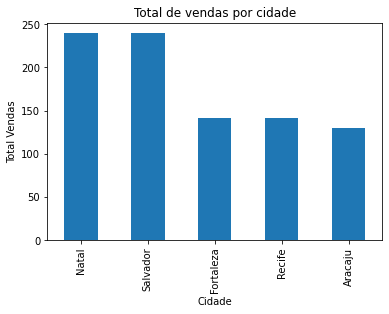

In [48]:
#Total de vendas por cidade

#Gráfico do Pandas 
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade')

#Personalização do Matplotlib
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

Text(0, 0.5, 'Total Vendas')

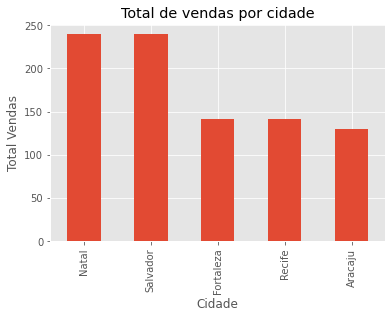

In [49]:
#Alterando o estilo
plt.style.use('ggplot')

#Gráfico do Pandas 
df['Cidade'].value_counts().plot.bar(title = 'Total de vendas por cidade')

#Personalização do Matplotlib
plt.xlabel('Cidade')
plt.ylabel('Total Vendas')

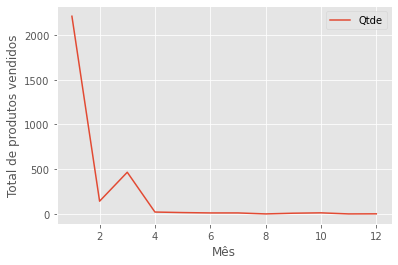

In [50]:
df.groupby( df["mes_venda"] )["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

In [51]:
df.groupby( df["mes_venda"] )["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [52]:
#Vendas de 2019
df_2019 = df[(df['Ano_Venda']==2019)]

# variável RECEBE as linhas de df [com os índices das linhas em que o Ano_Venda é igual a 2019]. 
df_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1,365 days,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1,365 days,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1,365 days,1
10,Aracaju,2019-01-01,42.34,1522,6,254.04,2019,1,1,365 days,1
11,Aracaju,2019-01-01,161.53,1520,4,646.12,2019,1,1,365 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


<AxesSubplot:xlabel='mes_venda'>

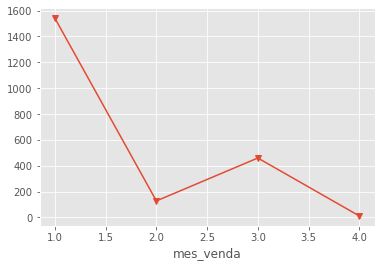

In [53]:
#Total de produtos vendidos por mês.

df_2019.groupby (df_2019 ['mes_venda']) ["Qtde"] .sum().plot (marker = 'v')

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

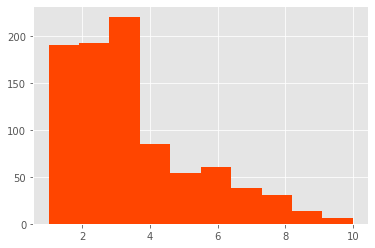

In [54]:
# Histograma

plt.hist(df['Qtde'], color = 'orangered')

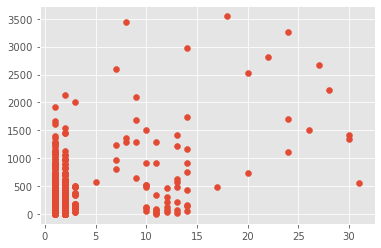

In [55]:
# Gráfico de dispersão

plt.scatter(x=df_2019["dia_venda"], y= df_2019["Receita"] )

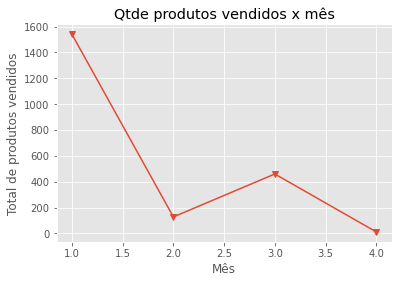

In [56]:
#Salvando em png
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker = "v")
plt.title('Qtde produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend
plt.savefig('qtde_produtos_vendidos_por_mes.png')